# Machine Learning Essentials SS25 - Exercise Sheet 1

## Instructions
- `TODO`'s indicate where you need to complete the implementations.
- You may use external resources, but <b>write your own solutions</b>.
- Provide concise, but comprehensible comments to explain what your code does.
- Code that's unnecessarily extensive and/or not well commented will not be scored.

## Exercise 2: The Perceptron Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

Feature Names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


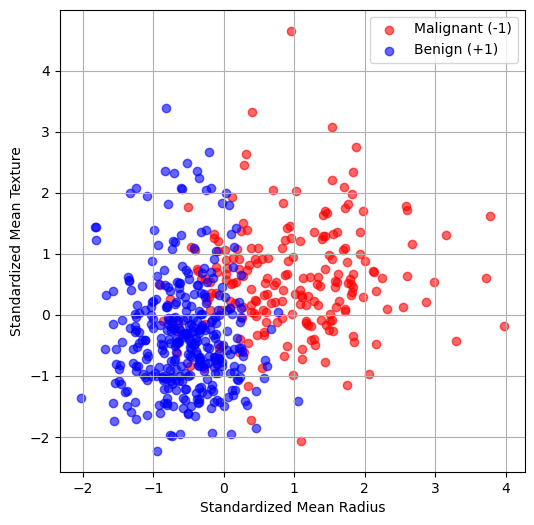

In [2]:
# ===============================
# 1. Load & Visualize the Dataset
# ===============================

# TODO: Load dataset, print feature names
data = load_breast_cancer()

print("Feature Names:")
print(data.feature_names)


# TODO: Select features & corresponding labels
X = data.data[:, [0, 1]] 
y = data.target

# Convert labels from {0,1} to {-1,1} to match Perceptron convention from sheet
y = 2 * (y - 0.5)

# TODO: Standardize the data to zero mean and unit variance, explain why it's useful
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# we standardize the features, so that features with large ranges don't dominate features with smaller ranges, even if both have the same importance


# TODO: Visualize dataset using plt.scatter()
plt.figure(figsize=(6, 6))
plt.scatter(X_std[y == -1, 0], X_std[y == -1, 1], color='red', label='Malignant (-1)', alpha=0.6)
plt.scatter(X_std[y == 1, 0], X_std[y == 1, 1], color='blue', label='Benign (+1)', alpha=0.6)
plt.xlabel('Standardized Mean Radius')
plt.ylabel('Standardized Mean Texture')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
# ========================
# 2. Implement the Perceptron's training algorithm
# ========================

class Perceptron:
    def __init__(self, learning_rate=0.1, num_epochs=10):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.w = None  # Weights
        self.b = None # Bias
        self.history = [] # Store parameters for decision boundary @ each update for visualization
    
    def train(self, X, y):
        """Train the perceptron using the online Perceptron algorithm."""
        n_samples, n_features = X.shape
        # TODO: Initialize weights and bias
        self.w = np.zeros(n_features)
        self.b = 0

        # Train for num_epochs iterations
        for _ in range(self.num_epochs):
            for i in range(n_samples):
                X_i = X[i]
                # TODO: Implement the update rule
                if y[i] != self.predict(X_i):
                    self.w = self.learning_rate * y[i] * X_i
                    self.b = self.learning_rate * y[i]
                    self.history.append((self.w,self.b)) # Save state for visualization 

    def predict(self, X):
        """Predict the label of a sample."""
        linear_output = np.dot(X, self.w) + self.b
        return np.sign(linear_output) 

In [4]:
# ========================
# 3. Train the Perceptron & Evaluate Performance
# ========================

#TODO: Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_std, y, test_size=0.2, random_state=42
)

#TODO: Initialize the Perceptron and train it on the training set
perceptron = Perceptron(learning_rate=0.1, num_epochs=100)
perceptron.train(X_train, y_train)

y_train_pred = perceptron.predict(X_train)
y_test_pred = perceptron.predict(X_test)
...

#TODO: Use the trained Perceptron to compute the accuracy on the training set and on the test set
...
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")

Training Accuracy: 0.668
Test Accuracy: 0.649


Total updates in history: 16094


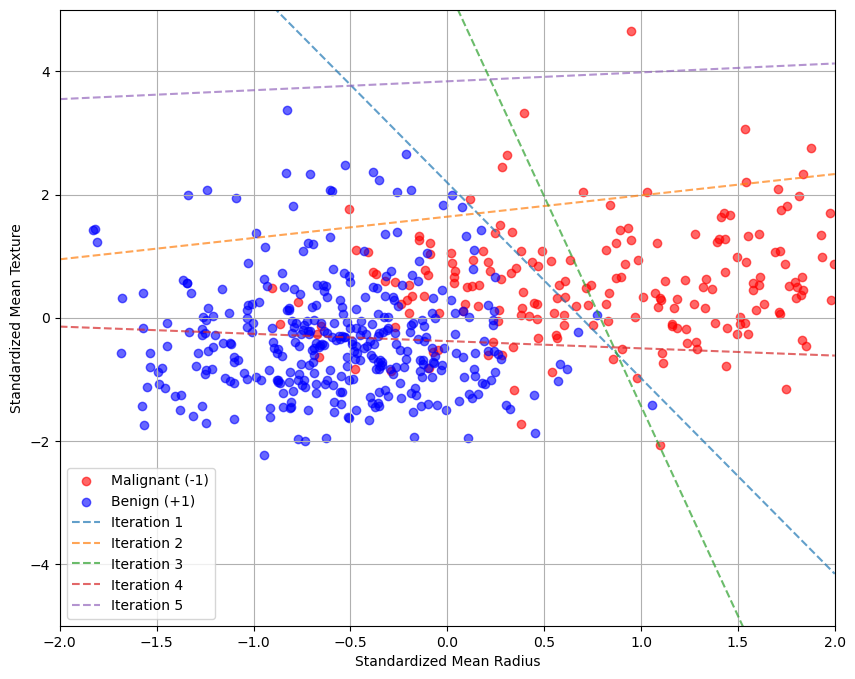

In [5]:
# ========================
# 4. Plot decision boundary evolution
# ========================
print(f"Total updates in history: {len(perceptron.history)}")

# Visualize the first 5 consecutive decision boundaries for data
decision_boundaries = perceptron.history[:5] # Get the parameters of the first 5 decision boundaries used during training

# TODO: Plot decision boundaries for iterations 1-5
plt.figure(figsize=(10, 8))

# Plot the data points
plt.scatter(X_std[y == -1, 0], X_std[y == -1, 1], color='red', label='Malignant (-1)', alpha=0.6)
plt.scatter(X_std[y == 1, 0], X_std[y == 1, 1], color='blue', label='Benign (+1)', alpha=0.6)

# Plot the first 5 decision boundaries
for i, (w, b) in enumerate(perceptron.history[:5]):
    x_plot = np.linspace(-2, 2, 100)
    y_plot = (-w[0] * x_plot - b) / w[1]
    
    plt.plot(x_plot, y_plot, label=f'Iteration {i+1}', linestyle='--', alpha=0.7)

plt.xlabel('Standardized Mean Radius')
plt.ylabel('Standardized Mean Texture')
plt.legend()
plt.grid(True)
plt.xlim(-2, 2)
plt.ylim(-5, 5)
plt.show()

### 5.
TODO: How many updates do you need until convergence (i.e. until no more model updates
occur)? Explain why.


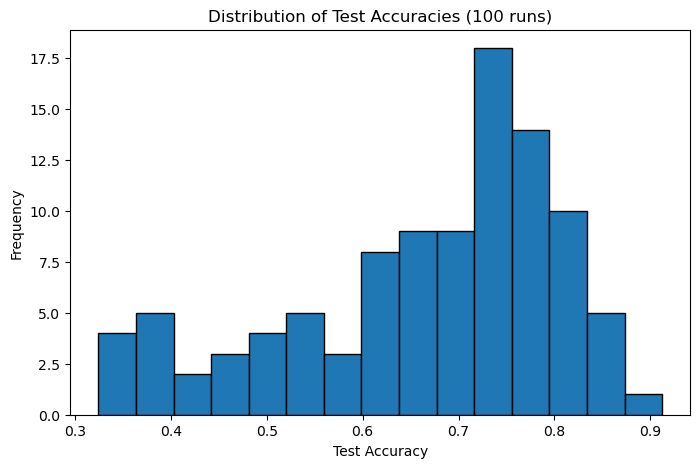

In [6]:
# ========================
# 6. Evaluate Performance Over Multiple Runs
# ========================

#TODO: Evaluate performance over multiple runs. Compute and store test accuracies


#TODO: Plot histogram for the test accuracies
num_runs = 100
test_accuracies = []

for _ in range(num_runs):
    X_train, X_test, y_train, y_test = train_test_split(
    X_std, y, test_size=0.2
)
    
    perceptron = Perceptron(learning_rate=0.1, num_epochs=1000)
    perceptron.train(X_train, y_train)
    
    # Test accuracy
    y_test_pred = perceptron.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_acc)

plt.figure(figsize=(8, 5))
plt.hist(test_accuracies, bins=15, edgecolor='black')
plt.xlabel('Test Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of Test Accuracies (100 runs)')
plt.show()



### (a)
TODO: What does the shape of the histogram tell you?

In [7]:
# (b)
#TODO: Compute the sample mean and standard deviation of the test accuracy
mean_acc = np.mean(test_accuracies)
std_acc = np.std(test_accuracies)
print(f"Mean Test Accuracy: {mean_acc:.3f}")
print(f"Standard Deviation: {std_acc:.3f}")

Mean Test Accuracy: 0.665
Standard Deviation: 0.142


### (c)
TODO: Given enough data points and for many training runs, what type of probability distribution would the histogram approximate and what is the reason for that?

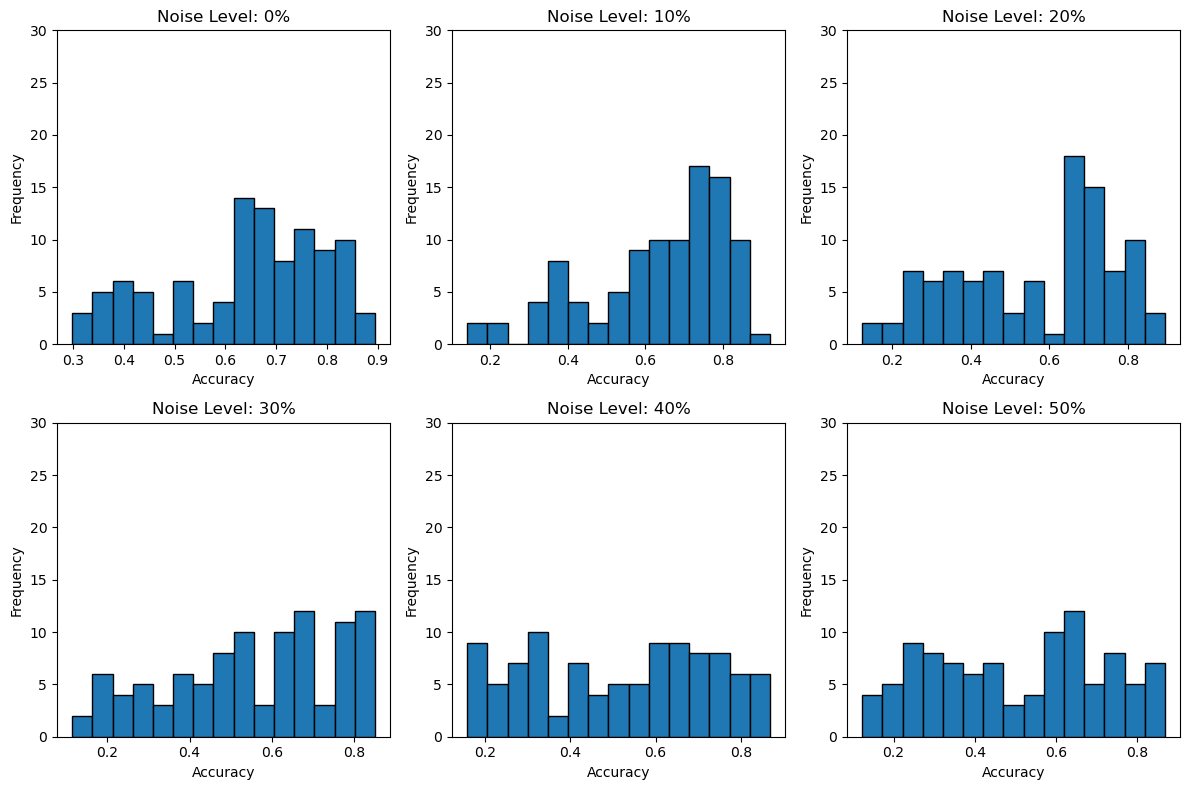

In [8]:
# (d)
p_values = [0, 10, 20, 30, 40, 50] # % of flipped training labels
#TODO: Add noise by flipping p% of labels. Visualize the effect using histograms for each p.

num_runs = 100
results = {p: [] for p in p_values}

for p in p_values:
    for _ in range(num_runs):
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2)
        
        # Add noise
        if p > 0:
            n_noise = int(len(y_train) * p/100)
            noise_indices = np.random.choice(len(y_train), n_noise, replace=False)
            y_train[noise_indices] *= -1  # Flip labels
        
        # Train and test
        perceptron = Perceptron(learning_rate=0.1, num_epochs=100)
        perceptron.train(X_train, y_train)
        y_test_pred = perceptron.predict(X_test)
        test_acc = accuracy_score(y_test, y_test_pred)
        results[p].append(test_acc)

# Plot histograms
plt.figure(figsize=(12, 8))
for i, p in enumerate(p_values):
    plt.subplot(2, 3, i+1)
    plt.hist(results[p], bins=15, edgecolor='black')
    plt.title(f'Noise Level: {p}%')
    plt.xlabel('Accuracy')
    plt.ylabel('Frequency')
    plt.ylim(0, 30)
plt.tight_layout()
plt.show()

TODO: Interpret the results

## Exercise 3: SVM

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_blobs
from cvxopt import matrix, solvers # Install cvxopt via "pip install cvxopt"

In [10]:
# ========================
# 1. Complete SVM implementation
# ========================

class DualSVM:
    def __init__(self, C=1.0, kernel="linear", gamma=1.0):
        self.C = C # Regularization constant
        self.kernel = kernel # Kernel type: "linear" or "rbf"
        self.gamma = gamma # Kernel parameter ("bandwith")
        self.alpha = None # Lagrange multipliers
        self.sv_X = None # Support vectors
        self.sv_y = None # Support vector labels
        self.w = None # Weights
        self.b = None # Bias

    def linear_kernel(self, X1, X2):
        #TODO: Implement linear kernel
        return np.dot(X1, X2.T)

    def rbf_kernel(self, X1, X2):
        #TODO: Implement RBF kernel
        X1_sq = np.sum(X1**2, axis=1).reshape(-1, 1)
        X2_sq = np.sum(X2**2, axis=1).reshape(1, -1)
        dist_sq = X1_sq - 2 * np.dot(X1, X2.T) + X2_sq
        return np.exp(-self.gamma * dist_sq)

    def compute_kernel(self, X1, X2):
        if self.kernel == "linear":
            return self.linear_kernel(X1, X2)
        elif self.kernel == "rbf":
            return self.rbf_kernel(X1, X2)
        else:
            raise ValueError("Unknown kernel type.")

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Compute kernel matrix K: K[i,j] = K(x_i, x_j)
        K = self.compute_kernel(X, X)

        """
        The dual objective is:
            max  sum_i alpha_i - 1/2 sum_i sum_j alpha_i alpha_j y_i y_j K(x_i, x_j)
        subject to:
            sum_i alpha_i y_i = 0  and  0 <= alpha_i <= C for all i.
        In QP formulation:
            P = (y_i y_j K(x_i,x_j))_{i,j},   q = -1 (vector),
            A = y^T, b = 0, and G, h implement 0 <= alpha_i <= C.
        """

        # TODO: Use the matrix function of cvxopt to define the QP parameters
        P = matrix(np.outer(y, y) * K, tc='d') # Use "d" flag to make sure that the matrix is in double precision format
        q = matrix([-1.0] * n_samples, (n_samples, 1), "d") # Use "d" flag to make sure that the matrix is in double precision format
        A = matrix(y, (1, n_samples),"d") # Use "d" flag to make sure that the matrix is in double precision format (labels are integers)
        b = matrix(0., (1, 1), "d") # Use "d" flag to make sure that the matrix is in double precision format
        
        
        # TODO: Implement inequality constraints by defining G and h
        G = matrix(np.vstack((-np.eye(n_samples), np.eye(n_samples))), tc='d') # Use "d" flag to make sure that the matrix is in double precision format
        h = matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * self.C)), tc='d') # Use "d" flag to make sure that the matrix is in double precision format

        # Solve the QP problem using cvxopt
        solvers.options["show_progress"] = False
        solution = solvers.qp(P, q, G, h, A, b)
        alphas = np.ravel(solution["x"]) # Get optimal alphas

        # Get support vectors (i.e. data points with non-zero lagrange multipliers, that are on the margin)
        sv = alphas > 1e-5 # alpha > 1e-5 to account for numerical errors
        self.alpha = alphas[sv]
        self.sv_X = X[sv]
        self.sv_y = y[sv]

        # The bias corresponds to the average error over all support vectors:
        # Why does the bias corresponds to the average error over all support vectors?
        # The answer is that the bias is the average of the differences between the true labels and the predicted labels
        # for the support vectors. The predicted labels are computed by the decision function f(x) = sum(alpha_i y_i K(x,x_i)) + b.
        # The difference between the true labels and the predicted labels is the error for each support vector.
        # The bias is the average of these errors.
        self.b = np.mean(self.sv_y - np.sum(self.alpha * self.sv_y * K[sv][:, sv], axis=1))

    def predict(self, X):
        #TODO: Implement the decision function and return the corresponding predicted labels
        return np.sum(self.alpha * self.sv_y * self.compute_kernel(X, self.sv_X), axis=1) + self.b

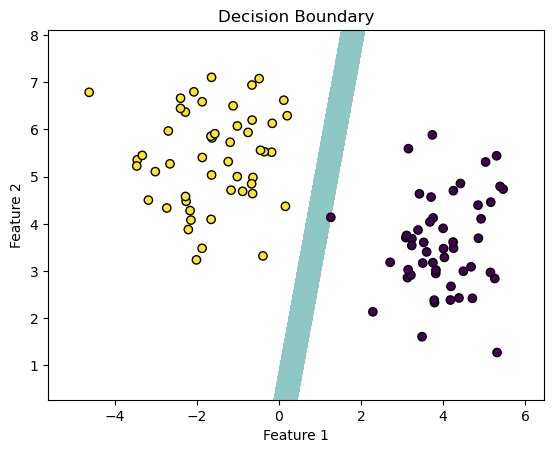

In [11]:
# ========================
# 2. Apply linear SVM on blobs
# ========================

# TODO: Generate blobs dataset
X_linear, y_linear = make_blobs(n_samples=100, n_features=2, centers=2, random_state=114514)

# Convert labels from {0,1} to {-1,1}
y_linear = 2 * (y_linear - 0.5) 

#TODO: Train SVM with linear kernel
svm_linear = DualSVM(C=2.5, kernel="linear")
svm_linear.fit(X_linear, y_linear)

#TODO: Plot decision boundary
def plot_decision_boundary(svm, X, y, title="Decision Boundary"):
    # Create a grid to plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # Compute the decision function for each point in the grid
    # .ravel(): [[], [], ..., []] |-> [...] create a flattened array
    # np.c_() concatenates the two arrays along the second axis (i.e. columns)
    # after doing this we get 100x100 pairs of points and feed it to the SVM
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary and the data points
    plt.contourf(xx, yy, Z, levels=[-1, 0], alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(svm_linear, X_linear, y_linear)


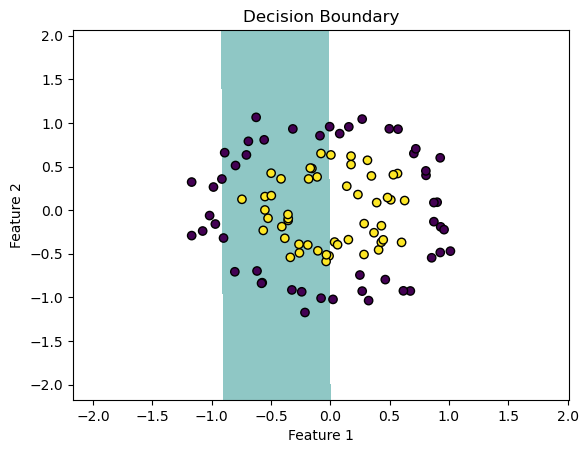

In [12]:
# ===========================
# 3. Apply linear SVM on circles
# ===========================

#TODO: Generate circles dataset
X_circles, y_circles = make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=114514)
y_circles = 2 * (y_circles - 0.5)  # Convert labels from {0,1} to {-1,1}

#TODO: Train SVM with linear kernel
svm = DualSVM(C=2.5, kernel="linear")
svm.fit(X_circles, y_circles)

#TODO: Plot decision boundary
plot_decision_boundary(svm, X_circles, y_circles)

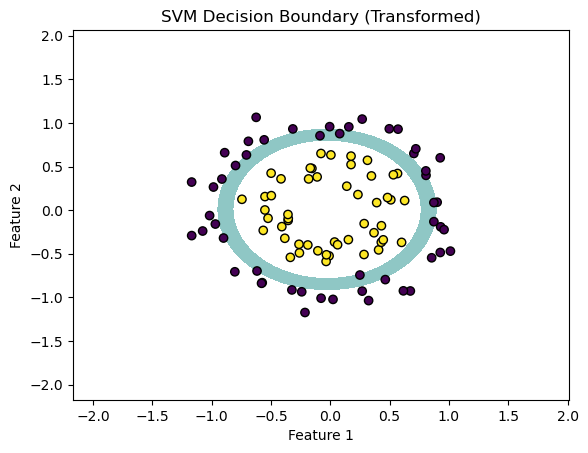

In [13]:
# ===========================
# 4. Apply feature transformation 
# ===========================

def transform_features(X):
    # TODO: compute feature transformation: f(x) = [x1, x2, x1^2 + x2^2]
    x1 = X[:, 0]
    x2 = X[:, 1]
    return np.column_stack((x1, x2, x1**2 + x2**2))


#TODO: Train SVM with linear kernel on transformed features
X_transformed = transform_features(X_circles)
svm_transformed = DualSVM(C=2.5, kernel="linear")
svm_transformed.fit(X_transformed, y_circles)

def plot_decision_boundary_transformed(X, y, model, title="SVM Decision Boundary (Transformed)"):
    # TODO: Implement plotting function for decision boundary in the transformed feature space
    # Hint: You could do this by creating a 2D meshgrid which you transform using the feature mapping.
    # Then, after evaluating the model on it, you can plot the result as a contour plot (plt.contourf).
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(transform_features(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, levels=[-1, 0], alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

#TODO: Plot decision boundary in the transformed feature space
plot_decision_boundary_transformed(X_circles, y_circles, svm_transformed)


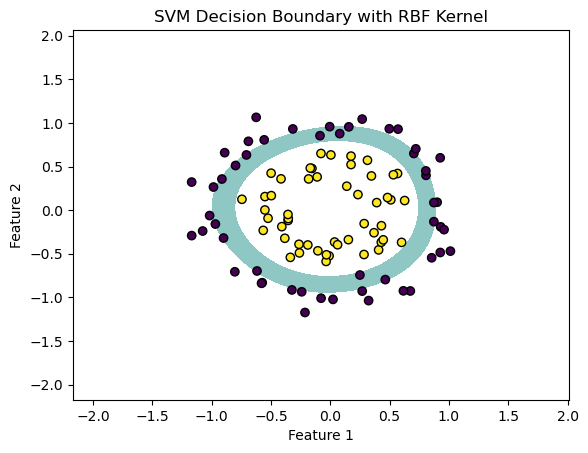

In [14]:
# ===========================
# 5. SVM with RBF Kernel on Circular Data
# ===========================

#TODO: Train SVM with RBF kernel on circular data
svm_rbf = DualSVM(C=2.5, kernel="rbf", gamma=1.0)
svm_rbf.fit(X_circles, y_circles)

#TODO: Plot decision boundary
plot_decision_boundary(svm_rbf, X_circles, y_circles, title="SVM Decision Boundary with RBF Kernel")

### 6.

TODO: Compare the decision boundaries from Tasks 3, 4, and 5. How does feature transformation differ from using an RBF kernel? When would one approach be preferable to the other?

The decision boundary of transformation looks smoother (rounder?) than radial basis function.

When we use transformation, we don't necessarily know how we could transform the data to make them separable by some hyperplanes. At the same time, we have full control and interpretability.

RBF kernel can adapt to different kind of boundaries automagically, whereas sometimes we need to tune the parameter $\gamma$.

### 7. 

TODO: Besides the dual formulation, SVMs also have an equivalent primal formulation. The key factor in choosing which one to use as the optimization criterion is the dimensionality of the features. Explain why.

In high-dimensional spaces (i.e., when $d$ is large), the primal problem becomes computationally expensive because it involves directly manipulating a high-dimensional weight vector w, and the number of operations required scales with $d$.

On the other hand, the dual problem only involves the kernel matrix, which is $n\times n$, where $n$ is the number of samples. Since the kernel matrix doesn’t directly depend on the feature dimension $d$, the dual formulation can be more efficient when $d$ is large and $n$ is smaller.